<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install sklearn-lvq

In [9]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
from sklearn_lvq import GlvqModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import math
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [10]:
#Para acomodar la información si viene por minuto y en registros, 
#df = pd.read_csv('rg1.csv')
## aqui agrupamos por minuto
#df_grouped_multiple = df.groupby(['YEAR','MONTH','DAY','HOUR']).agg({'RG1': ['mean']})
#df_grouped_multiple.columns = ['rg1_mean']
#df_grouped_multiple = df_grouped_multiple.reset_index()
## aquí pivoteamos
#df1 = df_grouped_multiple.pivot(index=['YEAR','MONTH','DAY'], columns='HOUR', values='rg1_mean').dropna()
#print(df1) #df1.to_csv('res.csv')
#df1.columns = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']]

In [11]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,ytitle_,xtitle_,dot_,namefile_):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel(xtitle_, color=LETRASNARA, fontsize='large')
    ax1.set_ylabel(ytitle_, color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    for p in serie_:
        if dot_== True:
           plt.plot(p,alpha=0.4, linestyle='dashed', linewidth=3)
        else:
           plt.plot(p,alpha=0.4)                
    plt.savefig(namefile_, transparent=True)         
    plt.show()

In [12]:
def scatterplot(X_,Y_,tags_,centers_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    for k in centers_:
        x = k[7]; y = k[8]
        plt.plot(x,y,"o",color="red",)
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('hora 7',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('hora 8',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, c=tags_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

In [13]:
def print_patrones(list_series,list_categorias,list_patrones,title_,namefile_): 
    cat = np.unique(list_categorias)
    n = math.ceil(pow(n_clusters, 0.5))
    fig, axs = plt.subplots(n, n, figsize=(15,14))
    row=0; col=0
    for c in cat:
        j = 0
        for g in list_categorias:    
            if c == g:
                axs[row,col].plot(list_series[j],alpha=0.5)
                axs[row,col].set_title(title_+str(c))
                #axs[row,col].xaxis.set_xlabel(horas_invierno)
            j = j + 1
        if len(list_patrones) != 0:
            axs[row, col].plot(list_patrones[c],alpha=0.7,color='red',linestyle='dashed',linewidth=4)
        col = col + 1
        if col == n:
            col = 0
            row = row + 1  
    plt.savefig(namefile_, transparent=True)
    plt.show()

# **Leemos datos fotovoltaicos**

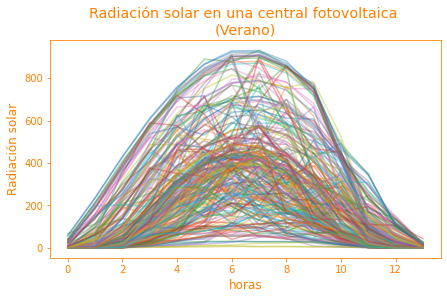

In [14]:
df = pd.read_csv('rg1_horas.csv')

##totales por dia ('SUMA'), diferenciados de primer orden ('dSUMA'), de segundo orden ('ddSUMA')
x_total   = df[['SUMA']].to_numpy()
dx_total  = df[['dSUMA']].to_numpy()
ddx_total = df[['ddSUMA']].to_numpy()

## Por estación del año
df_invierno = df[(df.MONTH==11)|(df.MONTH==12)|(df.MONTH==1)|(df.MONTH==2)|(df.MONTH==3)|(df.MONTH==4)]
df_verano   = df[(df.MONTH==5) |(df.MONTH==6) |(df.MONTH==7)|(df.MONTH==8)|(df.MONTH==9)|(df.MONTH==10)]
df = df_invierno
horas_verano   = ['4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
horas_invierno = ['5','6','7','8','9','10','11','12','13','14','15','16','17','18']
X = df[horas_invierno].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X  = sc.fit_transform(X)
#y  = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.3)

print_serie(X_train,'Radiación solar en una central fotovoltaica \n(Verano)','Radiación solar','horas',False,'fig_t13_all')

# **K-means**


y_kmeans [8 9 0 1 8 9 8 7 4 9 4 8 7 2 4 5 1 1 0 9 4 2 9 9 0 6 0 6 8 9 0 3 8 9 0 0 1
 1 9 0 9 7 9 3 1 4 0 8 6 0 2 2 0 0 1 0 5 9 0 4 0 8 1 4 5 2 8 4 9 2 5 5 5 4
 5 4 3 8 8 1 2 9 0 9 3 1 8 4 1 9 0 0 0 9 1 6 9 6 8 4 8 3 2 9 1 2 2 1] 108
y_kmeans_train [4 8 0 2 9 9 4 4 9 4 7 6 3 9 0 0 1 6 4 4 2 7 5 4 4 2 1 9 4 4 4 9 9 0 0 2 2
 0 2 3 9 3 7 6 2 5 2 1 3 0 2 5 4 2 9 0 3 4 2 1 4 2 2 2 1 5 3 4 1 9 3 0 1 0
 8 8 9 9 0 9 0 5 3 4 9 1 7 0 4 2 1 4 0 8 0 4 1 1 8 7 0 7 0 8 3 0 2 3 9 8 6
 9 1 2 3 6 5 9 6 0 9 2 2 4 7 0 7 4 0 0 3 9 2 0 0 2 7 6 1 0 0 4 0 9 9 5 9 5
 0 5 2 0 9 4 2 2 0 3 0 5 0 7 4 2 4 9 9 5 5 5 1 0 0 3 6 4 6 9 7 0 1 0 8 1 8
 4 1 2 9 0 1 8 1 1 9 7 0 7 4 0 1 0 3 4 4 2 4 2 9 2 4 0 0 0 2 0 3 9 2 7 8 4
 0 7 2 2 2 2 9 4 2 8 1 2 5 9 2 0 6 9 4 7 2 2 1 3 3 2 1 0 3 2] 252


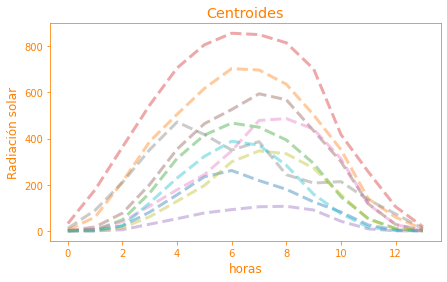

In [15]:
n_clusters = 10
k_means = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans, KMeans
k_means = k_means.fit(X_train)
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
kmeans_centers_= k_means.cluster_centers_
#print('Centroides', centers_)
#print('Exactitud:', k_means.score(X_test))
y_kmeans = k_means.predict(X_test)
y_kmeans_train = k_means.predict(X_train)
print('y_kmeans' , y_kmeans,len(y_kmeans ))
print('y_kmeans_train' , y_kmeans_train,len(y_kmeans_train))
print_serie(kmeans_centers_,'Centroides','Radiación solar','horas',True,'fig_t13_centroids_kmeans')
#scatterplot(X_train[:,4],X_train[:,8],labels,centers_,'Radiación solar \n K-means \n(entrenamiento)','fig_t13_train')

X_train (kmeans)


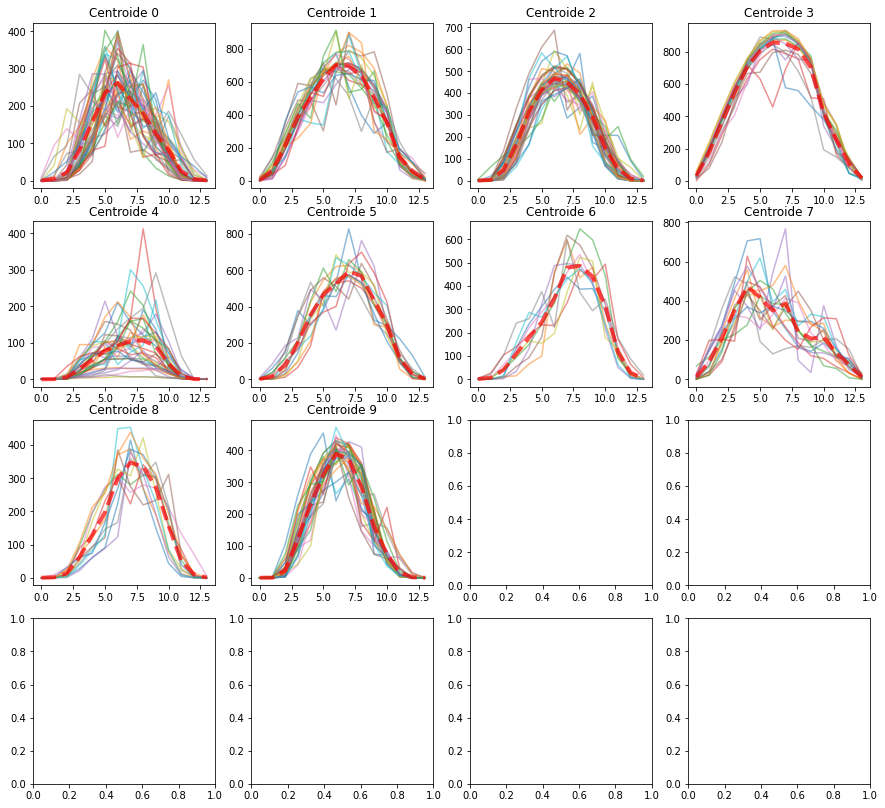

In [16]:
print('X_train (kmeans)')
print_patrones(list_series=X_train,list_categorias=y_kmeans_train,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_kmeans_train')

X_test (kmeans)


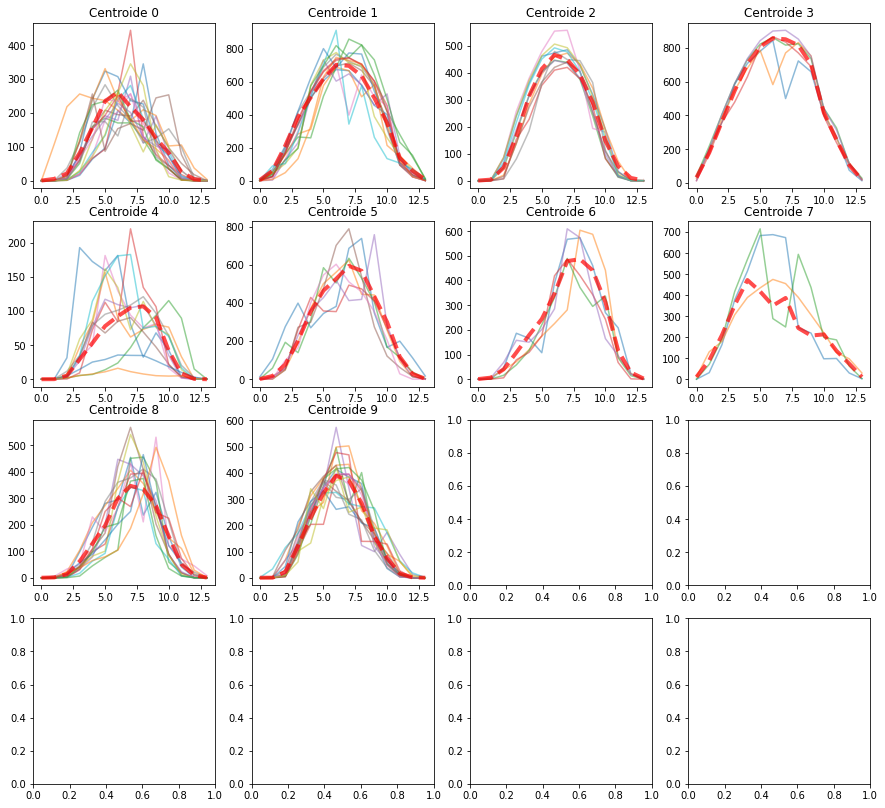

In [17]:
print('X_test (kmeans)')
print_patrones(list_series=X_test,list_categorias=y_kmeans,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_kmeans_test')

# **KNN from scratch**


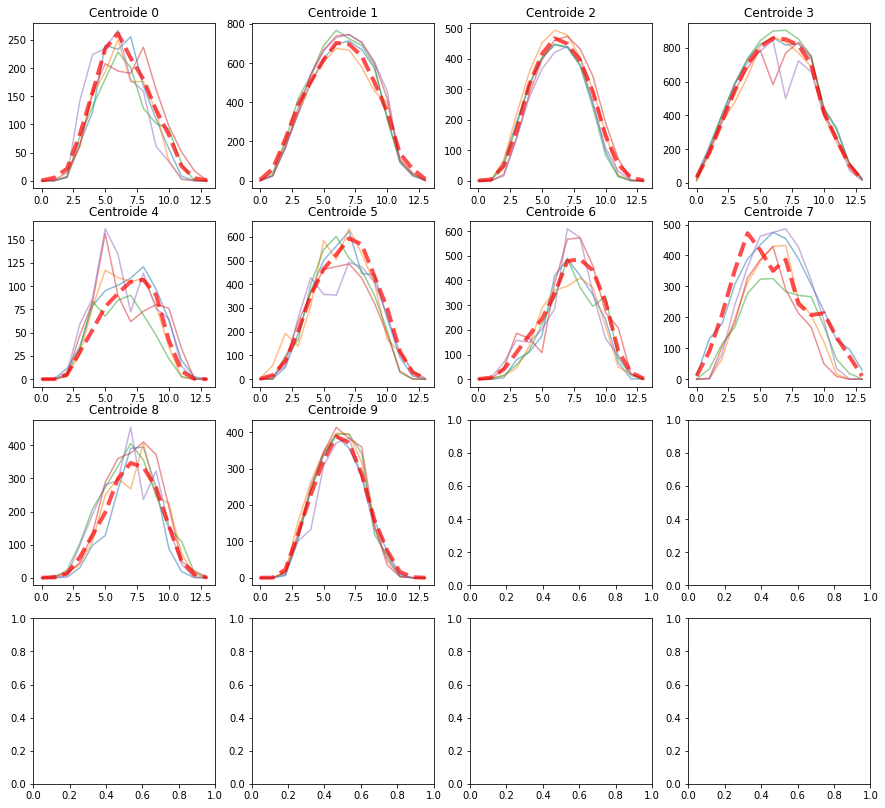

In [18]:
#https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
def euclidean(neig1, neig2):
	  distance = 0.0
	  for i in range(len(neig1)):
		    distance += (neig1[i] - neig2[i])**2
	  return sqrt(distance)
   
dataset = [[2.7810836,2.550537003,0],	[1.465489372,2.362125076,0],	[3.396561688,4.400293529,0],	[1.38807019,1.850220317,0],[3.06407232,3.005305973,0],	[7.627531214,2.759262235,1],	[5.332441248,2.088626775,1],	[6.922596716,1.77106367,1],	[8.675418651,-0.242068655,1],[7.673756466,3.508563011,1]]

row0 = dataset[0]
#for row in dataset:
#	  distance = euclidean(row0, row)
#	  print(distance)
	 
## Encuentra los vecinos más cercanos
def get_neighbors(train, test_row, num_neighbors):
  
    distances = list()

    for train_row in train:
        dist = euclidean(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])

    neighbors = list()

    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	  neighbors = get_neighbors(train, test_row, num_neighbors)
	  output_values = [row[-1] for row in neighbors]
	  prediction = max(set(output_values), key=output_values.count)
	  return prediction

prediction = predict_classification(dataset, dataset[0], 3)

#neighbors = get_neighbors(dataset, dataset[0], 5)
serie = []
cat   = []
i     = 0 
for center in kmeans_centers_:
    neighbors = get_neighbors(X_test, center, 5)
    for neighbor in neighbors:
        serie.append(neighbor)
        cat.append(i)
    i = i  + 1
print_patrones(list_series=serie,list_categorias=cat,list_patrones=kmeans_centers_,title_='Centroide ',namefile_='fig_t13_knn_scratch')

# **KNN de aportaciones hidrológicas en presas**

position [623, 548, 609, 488, 236, 297, 716, 200, 633, 600]


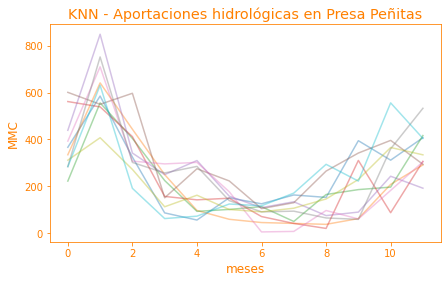

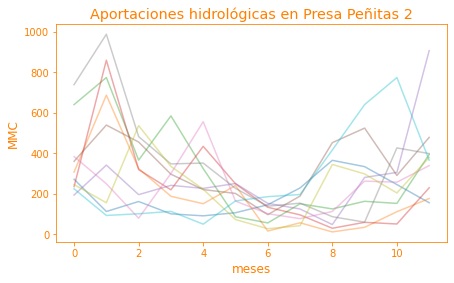

In [19]:
df = pd.read_csv('Aportaciones_Embalses.csv')
apor = df['PEA'].to_numpy()
v = 12                    ## tamanio de la ventana (un año)
k = 10                    ## número de vecinos a buscar k
vecindario    = []        ## vecindario completo
vecindario_b  = [] 
distances     = []
n             = len(apor) ## longitud total de la serie
tol           = 0.6         ## tolerancia de tamaño de ventanas para seleccion de vecinos
n             = n - 12    ## datos de test (comentar esta linea!!!)

#print(apor[n-v:n],'**')  ## imprime el prototipo
## Se calcula la distancia euclidiana entre todos los vecinos.
for i in range(n-2*v+1):
    dist = euclidean(apor[n-v:n],apor[i:i+v])
    distances.append((i, dist))
    #print(apor[n-v:n],apor[i:i+v],i, dist)

## Se ordena el vecindario por distancia de menor a mayor y se guardan las posiciones.
distances.sort(key=lambda tup: tup[1])
neighbors  = []
neighbors2 = []
position   = []

## Se escogen los k vecinos mas cercanos y guardamos las posiciones.
i = 0
for pos, dis in distances:
    #print(apor[pos:pos+v],dis,pos)

    if i==0:      
        position.append(pos)   
        neighbors.append(apor[pos:pos+v])
        neighbors2.append(apor[pos+v:pos+2*v])
    else:
        bandera = True
        for p in position:
            if (abs(pos - p) < tol*v):
                bandera = False
                i = i - 1
                break
        if bandera == True:
            #print(pos,p)
            position.append(pos)   
            neighbors.append(apor[pos:pos+v])
            neighbors2.append(apor[pos+v:pos+2*v])
            bandera = False
    i = i + 1
    if i == k:
        break

## Convertimos a numpy.  
neighbors  = np.array(neighbors)
neighbors2 = np.array(neighbors2)
print('position',position)    ## posición de los k vecinos mas cercanos.
#print(neighbors)   ## k vecinos mas cercanos.
#print(neighbors2)  ## ventana de datos posterior a los k vecinos mas cercanos.

print_serie(neighbors, 'KNN - Aportaciones hidrológicas en Presa Peñitas','MMC','meses', False,'fig_t13_aportaciones')
print_serie(neighbors2,'Aportaciones hidrológicas en Presa Peñitas 2','MMC','meses', False,'fig_t13_aportaciones2')

In [20]:
X   = sm.add_constant(neighbors.T)
X_2 = sm.add_constant(neighbors2.T)
y   = apor[n-v:n]
y_2 = apor[n-v+12:n+12]

model   = sm.OLS(y, X)
results = model.fit()
result_prediction = results.predict(X_2)
#print(result_prediction)
#print(results.summary())

## Se ordenan los valores p y se selecciona el más grande.
i = 0
pvalues = []
for pi in results.pvalues:
    pvalues.append((i,pi))
    i = i + 1
pvalues.sort(key=lambda tup: tup[1])
(i, pi) = pvalues[0]

## Proceso de stepwise
while pi > 0.05:
    print('Retiramos regresor X' + str(i))
    X   = np.delete(arr=X,   obj=i, axis=1)
    X_2 = np.delete(arr=X_2, obj=i, axis=1)
    model   = sm.OLS(y, X)
    results = model.fit()

    ## Se ordenan los valores p y se selecciona el más grande
    i = 0
    pvalues = []
    for pi in results.pvalues:
        pvalues.append((i,pi))
        i = i + 1
    pvalues.sort(key=lambda tup: tup[1])
    (i, pi) = pvalues[0]
    print(pi)

result_prediction = results.predict(X)
print(result_prediction)
print(results.summary())

# Exactitud del modelo
print('Test MAE OLS + stepwise= ', mean_absolute_error(y,y_2))

Retiramos regresor X8
0.5544832829193845
Retiramos regresor X2
0.2104646454083143
Retiramos regresor X0
0.2704796481080383
Retiramos regresor X7
0.4128298391624295
Retiramos regresor X0
0.22872559749863908
Retiramos regresor X1
0.25302812874300057
Retiramos regresor X0
0.12772465007955286
Retiramos regresor X3
0.035074579047985145
[499.57885552 670.37588503 449.42131265 211.06037366 288.58066419
 190.58834313  83.49578515 103.26843778 167.30642308 199.9637757
 298.42921458 261.758269  ]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              38.44
Date:                Fri, 22 Apr 2022   Prob (F-statistic):                    1.85e-05
Time:                        17:54:07   Log-Likelihood:             

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


# **LVQ**

In [21]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py

print('GLVQ')
glvq = GlvqModel(prototypes_per_class=1, initial_prototypes=None)
glvq.fit(X_train,labels)
glvq_pred = glvq.predict(X_test)
glvq_pred_train = glvq.predict(X_train)
print('glvq_pred',glvq_pred)
print('glvq_pred_train', glvq_pred_train)
print('classification accuracy:', (glvq.score(X_test, glvq_pred)))
plt.show()

GLVQ
glvq_pred [8 9 0 1 8 9 8 2 4 9 4 8 7 2 4 5 1 1 0 9 4 2 9 9 0 6 0 6 8 9 0 3 8 9 0 0 1
 1 9 0 9 7 0 3 1 4 0 8 8 0 2 2 0 0 1 0 5 9 0 4 0 8 1 4 5 2 8 4 2 2 5 5 5 4
 2 4 3 8 8 1 2 9 0 9 3 1 8 4 1 9 0 0 0 9 1 6 9 6 8 4 8 3 2 9 1 2 2 1]
glvq_pred_train [4 8 0 2 9 9 4 4 9 0 7 6 3 9 0 0 1 6 4 4 2 7 5 4 4 2 1 9 4 4 4 9 9 0 0 2 2
 0 2 3 9 3 7 6 2 5 2 1 3 0 2 5 4 2 9 0 3 4 2 1 4 2 2 2 1 5 3 4 1 9 3 0 1 0
 8 8 9 9 0 9 0 5 3 4 9 1 7 0 4 2 1 4 0 8 0 4 1 1 8 7 0 7 0 8 3 0 2 3 9 8 6
 9 1 2 3 6 5 9 6 0 9 2 2 4 7 0 7 4 0 0 3 9 2 0 0 2 7 6 1 0 0 4 0 9 9 5 9 5
 0 5 2 0 9 4 2 2 0 3 0 5 0 7 4 2 4 9 9 5 5 5 1 0 0 3 6 4 6 0 7 0 1 0 8 1 8
 4 1 2 9 0 1 8 1 1 9 7 0 7 4 0 1 0 3 4 4 2 4 2 9 2 0 0 0 0 2 0 3 9 2 7 8 4
 0 7 2 2 2 2 9 4 2 8 1 2 5 9 2 0 6 9 4 7 2 2 1 3 3 2 1 0 3 2]
classification accuracy: 1.0


X_train (LVQ)


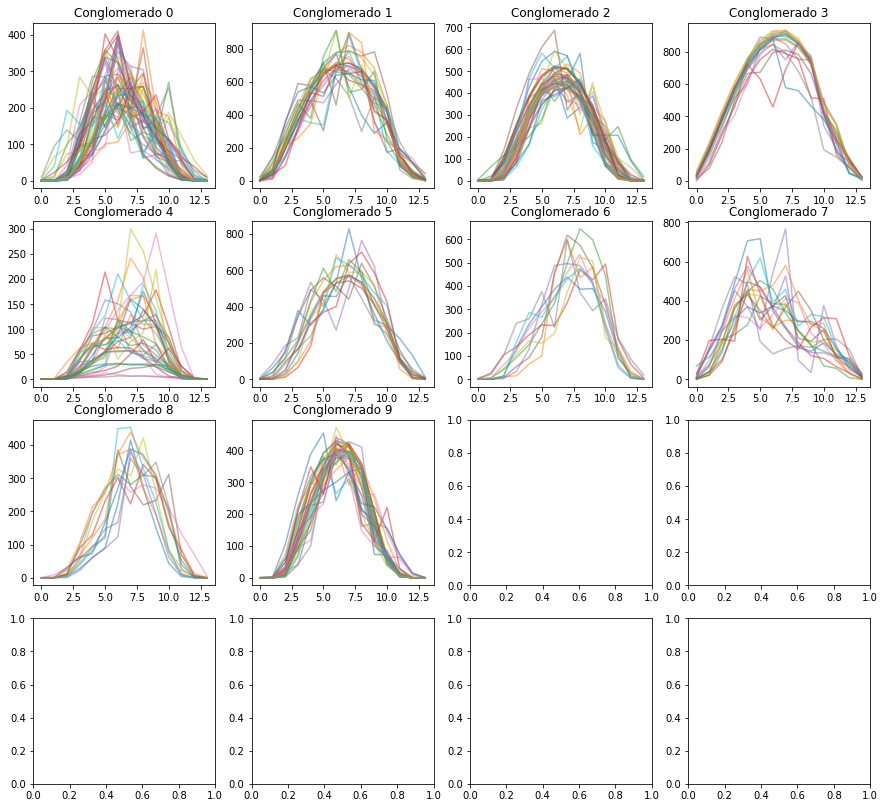

In [22]:
print('X_train (LVQ)')
print_patrones(list_series=X_train,list_categorias=glvq_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_lvq_train')

X_test (LVQ)


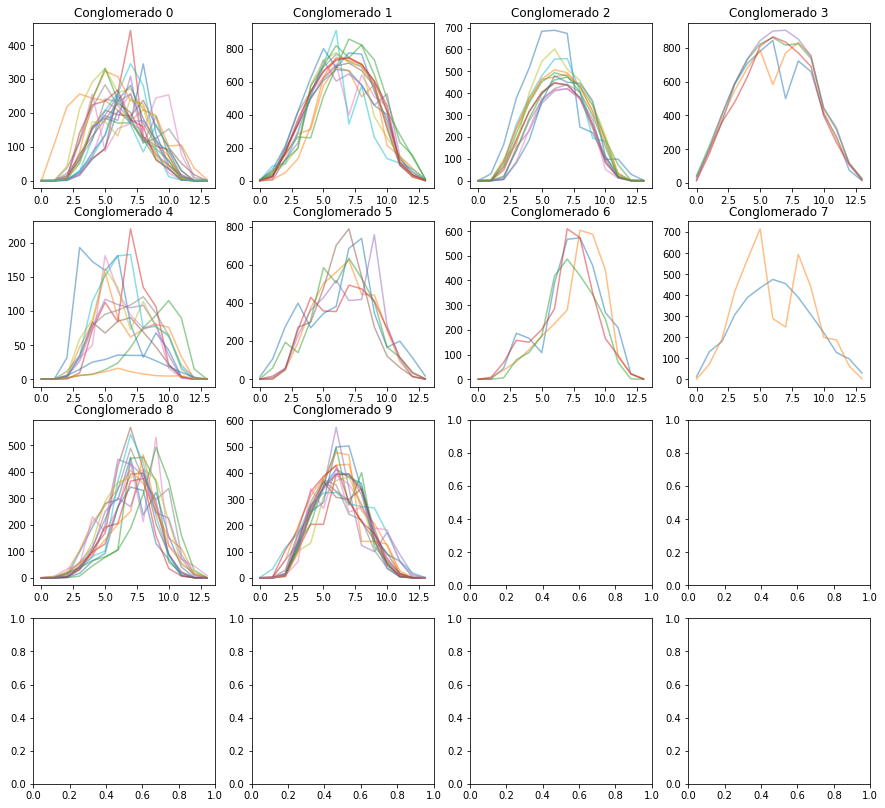

In [23]:
print('X_test (LVQ)')
print_patrones(list_series=X_test,list_categorias=glvq_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_lvq_test')

# **GaussianMixture**

In [24]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
gm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='full') #full, tied, diag, spherical
gm.fit(X_train)
gm_pred_train = gm.predict(X_train)
gm_pred       = gm.predict(X_test)

print('classification accuracy train:', gm.score(X_train, gm_pred_train))
print('classification accuracy:', gm.score(X_test, gm_pred))

print('gm_pred',gm_pred)
print('gm_pred_train', gm_pred_train)

classification accuracy train: -45.579615067063074
classification accuracy: -303.55190236190765
gm_pred [0 0 0 1 9 0 0 1 0 0 0 0 7 9 9 2 1 7 7 0 0 0 9 9 0 9 0 1 0 0 0 2 0 0 9 0 7
 9 0 9 1 7 0 2 7 0 0 1 9 0 0 0 0 0 1 0 1 0 0 0 0 1 2 0 7 0 0 9 0 0 1 1 9 0
 9 0 2 0 9 7 9 0 0 0 2 1 9 9 7 9 0 0 0 0 1 0 0 9 0 0 9 2 0 9 2 9 9 7]
gm_pred_train [0 0 0 1 9 0 0 0 0 0 6 8 2 0 0 0 4 8 0 0 0 6 7 0 0 1 7 0 0 0 0 0 0 0 0 0 9
 0 9 2 0 2 6 8 0 1 0 7 4 0 9 1 9 9 0 0 2 0 1 4 0 1 9 0 7 1 2 0 7 0 2 0 5 0
 0 0 0 0 0 0 3 7 2 0 0 7 6 0 0 9 4 0 3 9 0 0 4 7 0 6 0 6 0 3 2 3 0 2 0 3 8
 0 4 0 4 8 7 3 8 0 9 0 0 0 6 0 6 0 0 0 2 0 9 0 0 9 6 8 4 9 0 0 3 0 0 1 0 1
 3 1 0 3 0 0 9 1 9 2 0 7 0 6 0 9 9 9 0 1 1 7 7 0 0 2 8 0 8 0 1 9 7 0 3 5 0
 0 1 0 0 0 4 0 4 7 9 1 0 6 0 3 4 0 2 0 0 0 0 9 0 1 0 3 0 0 0 0 2 0 9 6 3 0
 0 6 9 1 9 0 0 9 1 9 5 1 8 9 0 0 8 9 9 6 0 1 4 2 4 9 7 0 2 9]


X_train (GaussianMixture)


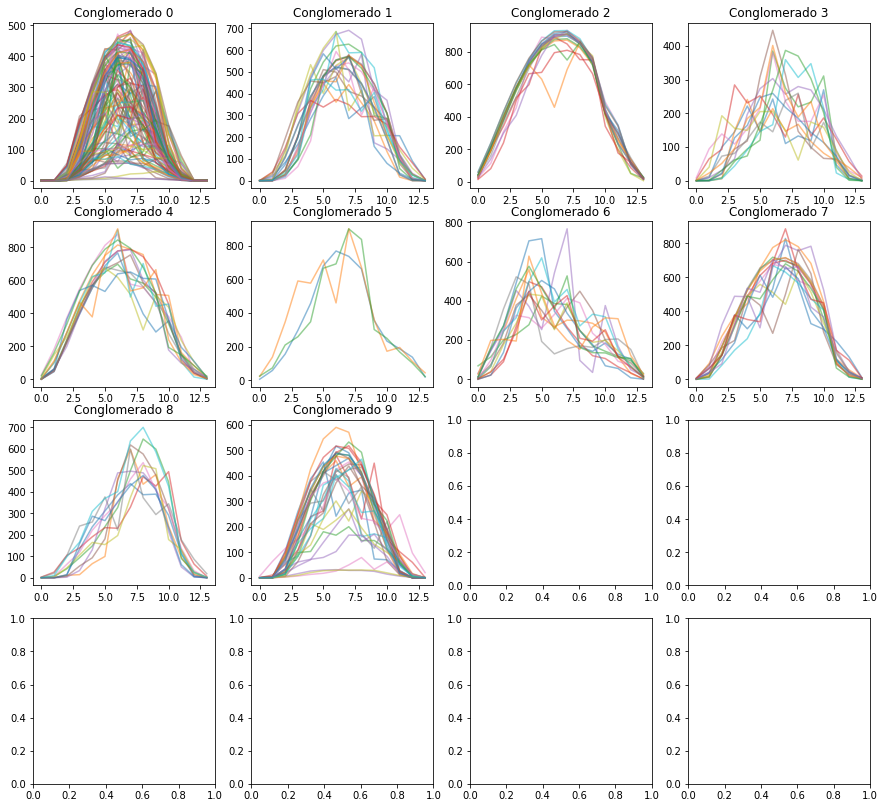

In [25]:
print('X_train (GaussianMixture)')
print_patrones(list_series=X_train,list_categorias=gm_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_gm_train')

X_test (GaussianMixture)


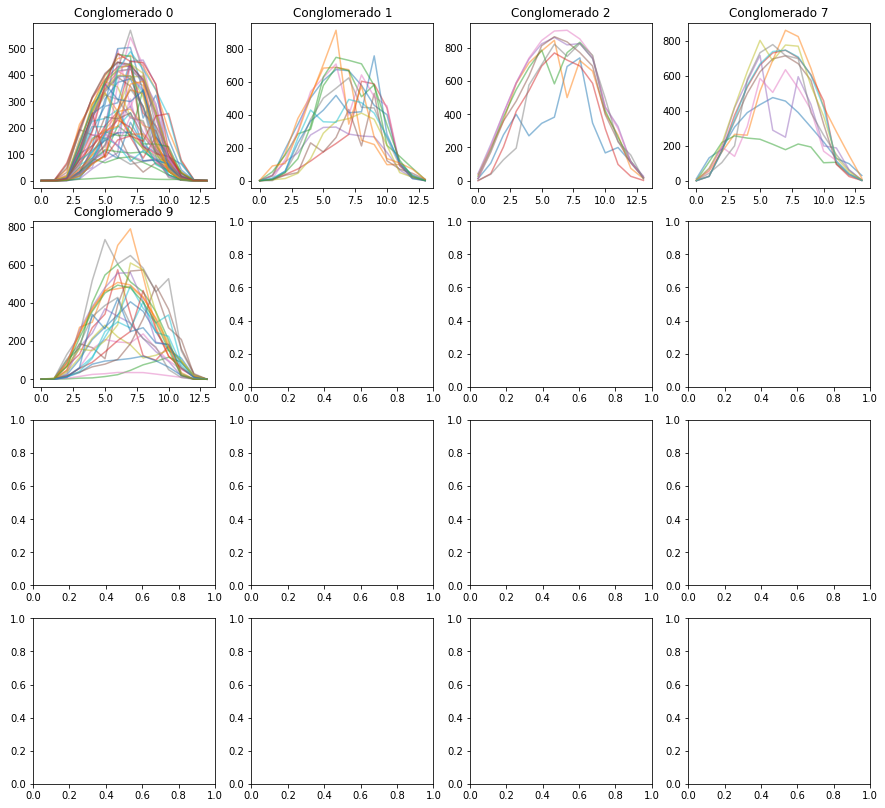

In [26]:
print('X_test (GaussianMixture)')
print_patrones(list_series=X_test,list_categorias=gm_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_gm_test')

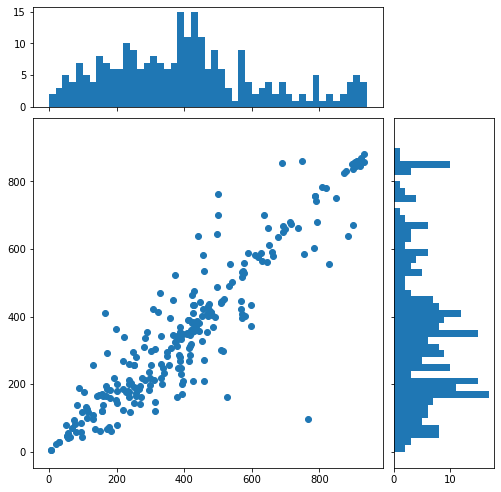

In [27]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    # the scatter plot:
    ax.scatter(x, y)
    # now determine nice limits by hand:
    binwidth = 20
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth
    bins = np.arange(0, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(X_train[:,7],X_train[:,8], ax, ax_histx, ax_histy)

plt.show()

# **KNN**

In [28]:
#https://scikit-learn.org/stable/modules/neighbors.html#classification
nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(X_train)  #['auto','ball_tree','kd_tree','brute'].
distances, indices = nbrs.kneighbors(X_train)
print(distances, indices)
nbrs.kneighbors_graph(X_train).toarray()

[[  0.          47.34845413  60.60437736 ...  99.41204515 101.41507124
  109.04565176]
 [  0.         123.52506268 176.7872183  ... 215.36897665 216.31540501
  217.99658642]
 [  0.          93.83417855 133.83439597 ... 169.70052792 184.25546046
  191.86324917]
 ...
 [  0.         101.96135705 129.7500524  ... 166.34651079 166.98278517
  172.21093975]
 [  0.          24.67030935  97.15302648 ... 173.60681393 194.16427179
  210.60172916]
 [  0.          37.58170732  60.12828641 ... 125.41280391 126.3729303
  133.92766087]] [[  0 185 203 ...  60 229 162]
 [  1  98 204 ...  94 128 156]
 [  2 134 102 ... 171 199  87]
 ...
 [249 133  49 ...  14 196  18]
 [250 130 157 ...  39  41 107]
 [251 218  38 ... 155 122 227]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, labels)
knn_pred_train = knn.predict(X_train)
knn_pred       = knn.predict(X_test)
print('knn_pred', knn_pred)
print('knn_pred_train',knn_pred_train )
print(knn.score(X_test,knn_pred))

knn_pred [8 9 0 1 9 2 8 2 4 9 4 8 2 2 4 5 1 1 0 9 4 2 9 9 0 6 0 6 8 9 0 3 9 9 0 0 1
 1 9 0 9 2 0 3 1 4 0 8 6 0 2 2 0 0 1 0 2 9 0 4 0 8 1 4 5 2 8 4 9 2 2 5 2 4
 2 0 3 0 8 1 2 9 0 9 3 1 8 4 1 9 0 0 0 9 1 6 9 6 0 4 8 3 2 9 1 2 2 1]
knn_pred_train [4 0 0 2 9 9 4 4 9 4 7 2 3 9 0 0 1 6 4 4 2 7 5 4 4 2 1 9 4 4 0 9 9 0 0 2 2
 0 2 3 9 3 7 6 2 5 2 1 1 0 2 5 4 2 9 0 3 4 2 1 4 2 2 2 1 5 3 4 1 9 3 0 1 0
 9 8 9 9 0 9 0 5 3 4 9 1 7 0 4 2 1 4 0 8 0 4 1 1 0 7 0 7 0 8 3 0 2 3 9 8 6
 9 1 2 1 2 1 9 6 0 9 2 2 4 7 0 7 4 0 0 3 9 2 0 0 2 7 6 1 0 0 4 0 9 9 5 9 2
 0 5 2 0 9 0 2 2 0 3 0 5 0 2 4 2 4 9 9 2 5 5 1 0 0 3 6 4 6 0 7 0 1 0 8 1 9
 4 1 2 9 0 1 9 1 1 9 2 0 7 4 0 1 0 3 4 4 2 4 2 9 2 4 0 0 0 2 0 3 9 2 7 8 4
 0 7 2 2 2 2 9 4 2 2 1 2 5 9 2 0 2 2 4 7 2 2 1 3 3 2 1 0 3 2]
1.0


X_train (KNN)


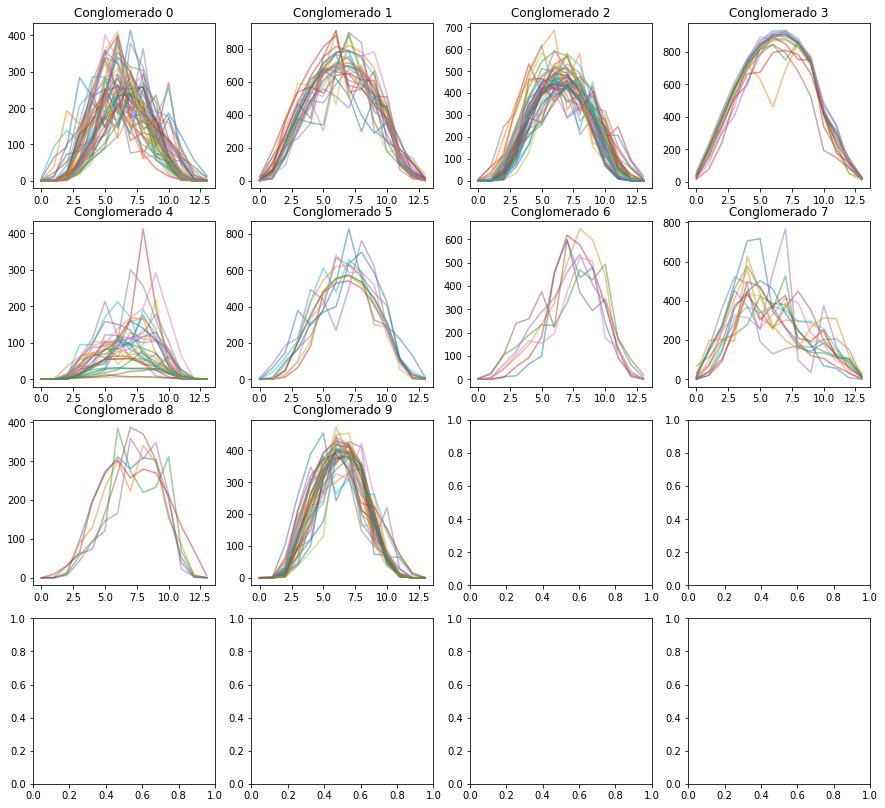

In [30]:
print('X_train (KNN)')
print_patrones(list_series=X_train,list_categorias=knn_pred_train,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_knn_train')

X_test (KNN)


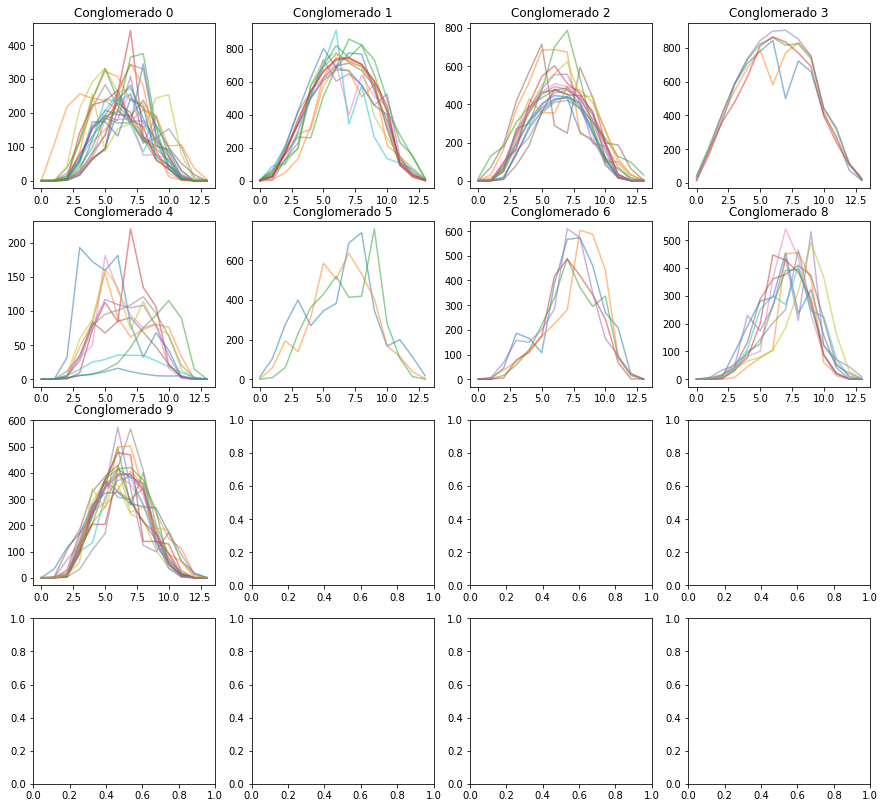

In [31]:
print('X_test (KNN)')
print_patrones(list_series=X_test,list_categorias=knn_pred,list_patrones=[],title_='Conglomerado ',namefile_='fig_t13_knn_test')

# **Radiación solar diaria**

In [32]:
#https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
model=ARIMA(x_total,order=(1,0,1))
model_fit=model.fit()

forecast_dx = model_fit.predict(start=550,end=650,dynamic=False)

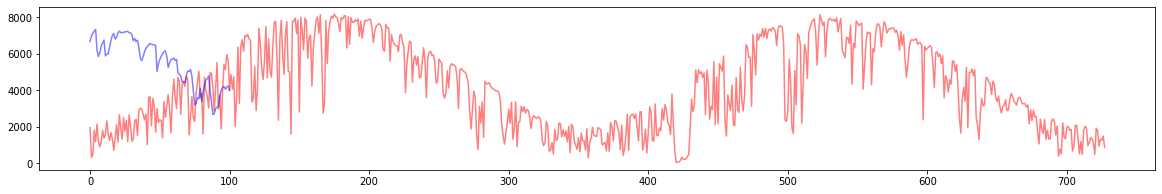

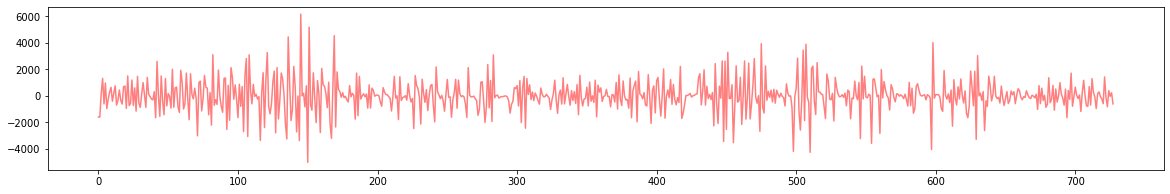

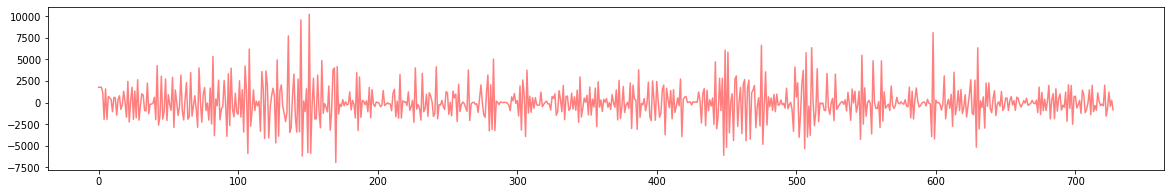

<Figure size 1440x216 with 0 Axes>

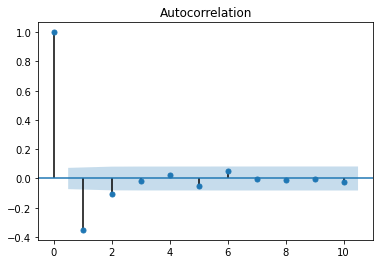

<Figure size 1440x216 with 0 Axes>

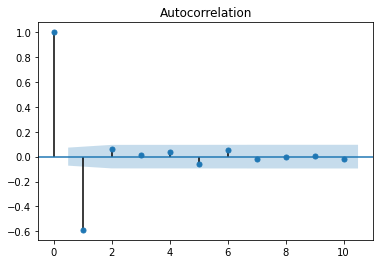

<Figure size 1440x216 with 0 Axes>

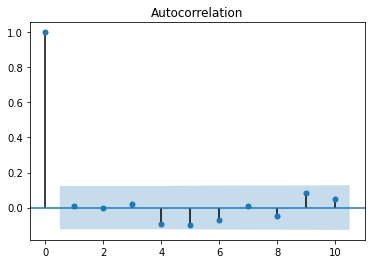

<Figure size 1440x216 with 0 Axes>

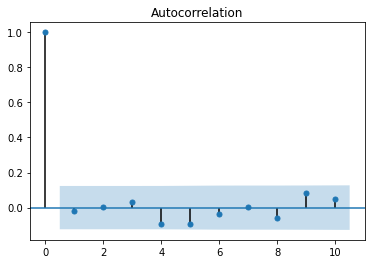

<Figure size 1584x360 with 0 Axes>

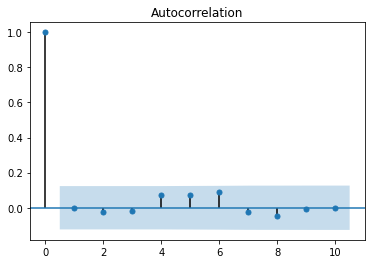

<Figure size 1440x216 with 0 Axes>

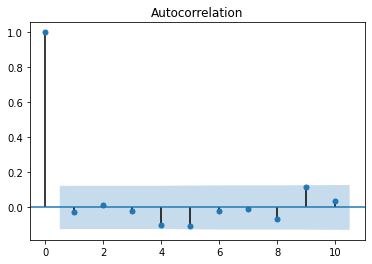

In [33]:
plt.figure(figsize=(20, 3))
plt.plot(x_total,alpha=.5,color='red')
plt.plot(forecast_dx,alpha=.5,color='blue')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(dx_total,alpha=.5,color='red')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(ddx_total,alpha=.5,color='red')
plt.show()

plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(dx_total, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(ddx_total, lags=10)
plt.show()


plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(y_kmeans_train, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(glvq_pred_train, lags=10)
plt.show()
plt.figure(figsize=(22, 5))
sm.graphics.tsa.plot_acf(gm_pred_train, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(knn_pred_train, lags=10)
plt.show()

In [34]:
model=ARIMA(gm_pred_train  ,order=(1,0,1))
model_fit=model.fit()

forecast_dx = model_fit.predict(start=200,end=300,dynamic=True)
print(forecast_dx)

ValueError: ignored

clusering (ventanas de diferente tamaño)

*   dynamic time warping (euclidiana)
*   matrix profile (  )
*   Abol de decisión o random forrest
*   standariza
*   piecewise agregation aproximation
*   sax simbolic aproximation 

https://matrixprofile.docs.matrixprofile.org/
https://matrixprofile.docs.matrixprofile.org/examples/Hierarchical_Clustering_Accelerometer_Walk_Stand_etc.html

In [ ]:
# Calcula los pesos y regresa una matriz diagonal con los pesos
def get_weight_exp(xo, X, kK): 
## k    : tamanio del vecindario (bandwidth)
## X    : Regresores
## xo   : punto donde se desea hacer la predicción.
    n = X.shape[0]             ## numero de datos
    weight = np.mat(np.eye(n)) ## Matriz de pesos identidad W.    
  # Cálculo de pesos para todos los datos de entrenamiento xi.
    for i in range(n): 
        xi = X[i] 
        d = (-2 * kK * kK) 
        weight[i, i] = np.exp(np.dot((xi-xo), (xi-xo).T)/d)
    return weight

def local_regression(X,Y,W,Xo):
    # W     --> Matriz diagonal de pesos
    # X     --> Regresores
    # xo    --> punto donde se desea hacer la predicción.
    Xt   = X.T  # Calcula transpuesta de X
    A    = np.matmul(Xt, np.matmul(W,X)) 
    A    = np.linalg.inv(A) # Calcula inversa de A
    B    = np.matmul(Xt, np.matmul(W,Y))
    beta = np.matmul(A,B)
    prediccion = np.matmul(Xo,beta)
    return prediccion

X = neighbors.T
Y = apor[n-v:n].T
print(X)
print(Y)

kK = 10 # Tamanio del vecindario
Y_local = []
for i in range(X.shape[0]):
    xo = X[[i]]
    W  = get_weight_exp(xo, X, kK)
    Y_prono = local_regression(X, Y, W, xo)
    Y_local.append(Y_gorro.item(0))
